In [1]:
import json

In [1]:
def read_json(json_file: str):
    """Read JSON data from a file.

    Args:
        json_file (str): The path to the JSON file.

    Returns:
        List[Dict]: A list of dictionaries containing the JSON data.
    """
    with open(json_file, 'r') as file:
        data = json.load(file)
    return data

In [1]:
path = "/home/so87pot/n0w0f/structllm/data/check/matbench_dielectric_380k.json.gz"

In [3]:
from matbench.bench import MatbenchBenchmark
mb = MatbenchBenchmark(autoload=False)
mp_perov = mb.matbench_dielectric
mp_perov.load()


2024-01-11 12:11:13 INFO     Initialized benchmark 'matbench_v0.1' with 13 tasks: 
['matbench_dielectric',
 'matbench_expt_gap',
 'matbench_expt_is_metal',
 'matbench_glass',
 'matbench_jdft2d',
 'matbench_log_gvrh',
 'matbench_log_kvrh',
 'matbench_mp_e_form',
 'matbench_mp_gap',
 'matbench_mp_is_metal',
 'matbench_perovskites',
 'matbench_phonons',
 'matbench_steels']
2024-01-11 12:11:13 INFO     Loading dataset 'matbench_dielectric'...
2024-01-11 12:11:17 INFO     Dataset 'matbench_dielectric loaded.


In [4]:
mb = mp_perov.from_file(path)

In [5]:
mb.is_recorded

{0: True, 1: True, 2: True, 3: True, 4: True}

In [15]:
mb.results

{'fold_0': {'data': {'mb-dielectric-0008': 2.5623326301574707,
   'mb-dielectric-0010': 2.2028746604919434,
   'mb-dielectric-0019': 3.930299758911133,
   'mb-dielectric-0025': 4.21816873550415,
   'mb-dielectric-0031': 2.4449145793914795,
   'mb-dielectric-0036': 2.126009464263916,
   'mb-dielectric-0038': 2.575176239013672,
   'mb-dielectric-0040': 2.8225796222686768,
   'mb-dielectric-0041': 1.8192411661148071,
   'mb-dielectric-0051': 3.9738428592681885,
   'mb-dielectric-0062': 2.951957941055298,
   'mb-dielectric-0071': 1.459267020225525,
   'mb-dielectric-0076': 1.8442264795303345,
   'mb-dielectric-0077': 4.363396167755127,
   'mb-dielectric-0085': 1.6627367734909058,
   'mb-dielectric-0086': 3.897231340408325,
   'mb-dielectric-0098': 1.7190762758255005,
   'mb-dielectric-0107': 2.996814012527466,
   'mb-dielectric-0113': 1.825896978378296,
   'mb-dielectric-0117': 1.4951119422912598,
   'mb-dielectric-0120': 1.5895233154296875,
   'mb-dielectric-0126': 2.5573408603668213,
   

In [6]:
mb

{'mae': {'mean': 0.26102390954177374,
  'max': 0.33011941669395983,
  'min': 0.1893218900283579,
  'std': 0.05201982651325002},
 'rmse': {'mean': 1.4593350606078868,
  'max': 2.4464141124703134,
  'min': 0.6838613861072197,
  'std': 0.6001578522597887},
 'mape': {'mean': 0.08194447339428694,
  'max': 0.10683400945555153,
  'min': 0.07221227398975988,
  'std': 0.012739694199062818},
 'max_error': {'mean': 32.097346498938556,
  'max': 58.51280353926338,
  'min': 11.224638617595971,
  'std': 16.251517801890785},
 '_ipython_canary_method_should_not_exist_': {}}

In [11]:
mb.scores

{'mae': {'mean': 0.0952255100595166,
  'max': 0.09874984633251227,
  'min': 0.09150807216577674,
  'std': 0.0024643599581262274},
 'rmse': {'mean': 0.1467789007091609,
  'max': 0.15146024989091236,
  'min': 0.14185075044088297,
  'std': 0.0034073622062235063},
 'mape': {'mean': 0.06062166929576589,
  'max': 0.06461727250134305,
  'min': 0.05793339786155495,
  'std': 0.0026466674667325243},
 'max_error': {'mean': 1.444216422935051,
  'max': 1.918656587600708,
  'min': 1.1123251164118244,
  'std': 0.27693705509672195},
 '_ipython_canary_method_should_not_exist_': {}}

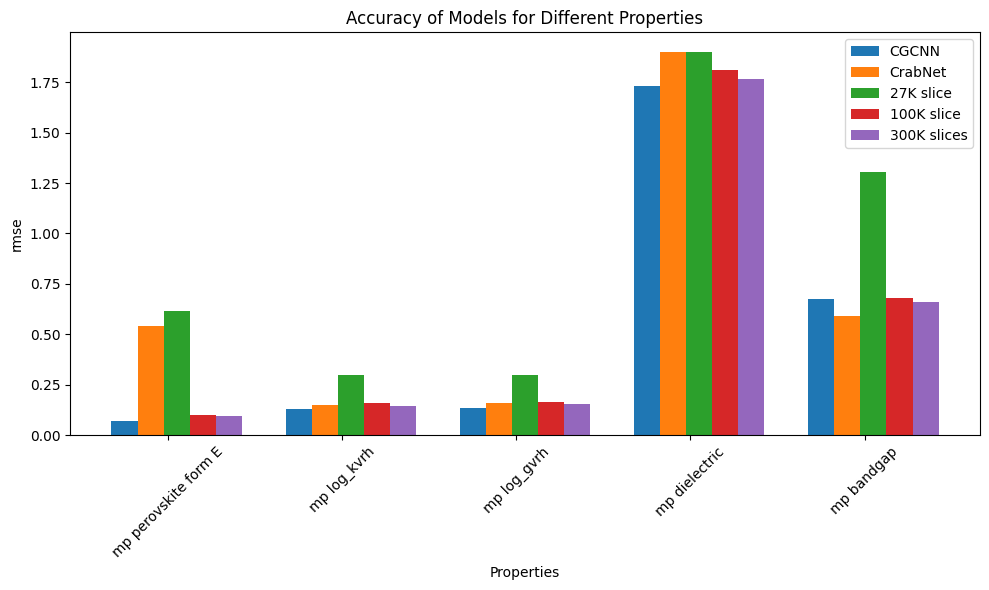

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data
properties = ['mp perovskite form E', 'mp log_kvrh', 'mp log_gvrh', 'mp dielectric', 'mp bandgap']
models = ['CGCNN', 'CrabNet', '27K slice', '100K slice', '300K slices']
accuracy = [
    [0.0722, 0.5412, 0.614, 0.1016, 0.095],
    [0.1301, 0.1471, 0.296, 0.15726, 0.1453],
    [0.1337, 0.1604, 0.298, 0.165, 0.153],
    [1.7288, 1.8976, 1.902, 1.81, 1.766],
    [0.6771, 0.5898, 1.304, 0.6821, 0.662]
]

# Convert data to np array
accuracy_np = np.array(accuracy)

# Plotting
x = np.arange(len(properties))
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

for i in range(len(models)):
    ax.bar(x + i * width, accuracy_np[:, i], width, label=models[i])

ax.set_xlabel('Properties')
ax.set_ylabel('rmse')
ax.set_title('Accuracy of Models for Different Properties')
ax.set_xticks(x + 0.25)
ax.set_xticklabels(properties)
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Save plot as PNG
plt.savefig('/home/so87pot/n0w0f/structllm/data/mb_3_head/accuracy_comparison.png')

plt.show()
